In [ ]:
%tensorflow_version 2.x

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-rsippyyq
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-rsippyyq
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34545 sha256=b488885ca14f6b9c16083cda4810038f2cb132671e7f77d77e91a7efdc9338fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-bf4wacyi/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation


In [ ]:
!mkdir /content/dataset
!mkdir /content/dataset/train_images
!mkdir /content/dataset/train_segmentation
!mkdir /content/dataset/val_images
!mkdir /content/dataset/val_segmentation

In [ ]:
from PIL import Image

for i in range(147):
  i = i+1
  img = Image.open('/content/drive/MyDrive/Json-Files/Segmentation/'+str(i)+'.png').convert('LA')
  img.save('/content/drive/MyDrive/Json-Files/Segmentation_greyscale/'+str(i)+'.png')

In [ ]:
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.fcn import fcn_32_vgg

#model = vgg_unet(n_classes=129 ,  input_height=384, input_width=384)

model = fcn_32_vgg(n_classes =129, input_height = 384, input_width =384)

model.train(
    train_images =  "/content/drive/MyDrive/Json-Files/Images",
    train_annotations = "/content/drive/MyDrive/Json-Files/Segmentation_greyscale",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=6
)



  6%|▌         | 9/147 [00:00<00:01, 86.32it/s]

Verifying training dataset


100%|██████████| 147/147 [00:01<00:00, 85.86it/s]


Dataset verified! 
Epoch 1/6
512/512 [==============================] - 616s 1s/step - loss: 4.2773 - accuracy: 0.6029

Epoch 00001: saving model to /tmp/vgg_unet_1.00001
Epoch 2/6
512/512 [==============================] - 613s 1s/step - loss: 1.0749 - accuracy: 0.7824

Epoch 00002: saving model to /tmp/vgg_unet_1.00002
Epoch 3/6
512/512 [==============================] - 614s 1s/step - loss: 1.0808 - accuracy: 0.7809

Epoch 00003: saving model to /tmp/vgg_unet_1.00003
Epoch 4/6
512/512 [==============================] - 613s 1s/step - loss: 1.0724 - accuracy: 0.7819

Epoch 00004: saving model to /tmp/vgg_unet_1.00004
Epoch 5/6
512/512 [==============================] - 613s 1s/step - loss: 1.0721 - accuracy: 0.7812

Epoch 00005: saving model to /tmp/vgg_unet_1.00005
Epoch 6/6
512/512 [==============================] - 614s 1s/step - loss: 1.0724 - accuracy: 0.7804

Epoch 00006: saving model to /tmp/vgg_unet_1.00006


In [ ]:
from keras_segmentation.data_utils.data_loader import class_colors
print(class_colors)
print(model.summary)

[(197, 215, 20), (132, 248, 207), (155, 244, 183), (111, 71, 144), (71, 48, 128), (75, 158, 50), (37, 169, 241), (51, 181, 222), (161, 104, 244), (226, 133, 31), (7, 47, 204), (0, 252, 170), (124, 166, 32), (97, 113, 122), (72, 229, 46), (41, 163, 250), (55, 154, 149), (63, 170, 104), (147, 227, 46), (197, 162, 123), (148, 94, 96), (95, 16, 133), (243, 35, 45), (66, 76, 19), (41, 200, 141), (120, 110, 214), (140, 230, 252), (182, 42, 166), (59, 249, 171), (97, 124, 8), (138, 59, 112), (190, 87, 170), (218, 31, 51), (74, 112, 23), (37, 13, 63), (96, 61, 200), (46, 189, 59), (18, 11, 99), (94, 63, 245), (107, 31, 11), (217, 51, 133), (35, 113, 36), (154, 179, 223), (92, 31, 239), (20, 51, 200), (102, 133, 183), (240, 86, 104), (29, 81, 82), (175, 128, 60), (226, 89, 6), (241, 209, 159), (182, 198, 128), (78, 6, 234), (40, 171, 23), (143, 69, 122), (246, 180, 147), (183, 67, 158), (198, 212, 41), (0, 98, 171), (81, 122, 114), (229, 193, 212), (16, 205, 214), (23, 84, 228), (32, 132, 80), 

In [ ]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/Big_Dataset_Test_Images/IMG_3402.png",
    out_fname="/tmp/out.png"
)

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

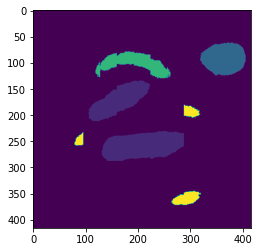

In [ ]:
plt.imshow(out)

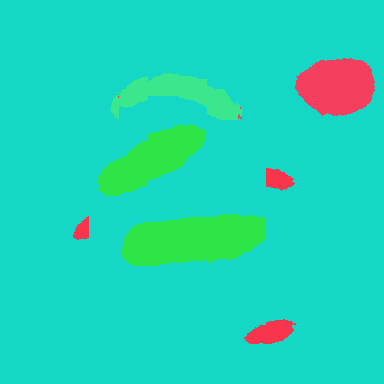

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/Big_Dataset_Test_Images/IMG_3402.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "_background_","Can","Mug","Spoon","Knife", "Plate", "Bonbon" , "Foodbar" , "Handkerchief", "Pen", "Ball", "Banana", "iPad" , "Mask" , "Fork", "Scissor", "Calculator", "Toothpaste", "Toothbrush", "Toiletpaper", "Bottle" , "Milk"]
    #class_names = ["_background_", "bottle", "can"]
)

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

Quelle : https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html